## Data Science Final Project 
### Author: Gagan Daroach

In [102]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pprint as pp
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns

pd.options.display.float_format = '{:,.3f}'.format

### Dataset

dataset link: https://www.kaggle.com/lava18/google-play-store-apps/version/5

Author Lavanya Gupta is responsible for the creation of this dataset. The dataset was last updated one month ago (as of Tue Oct 30 2018). The dataset was populated with web scraped data from the Google Play Store. There are 13 features that describe the dataset. 
       
App: App Name

Category: App Category

Rating: App Rating (0.0 thru 5.0)

Reviews: Number of reviews. 

Size: App install size

Installs: Number of Installs

Type: Either paid or free

Price: App Price

Content Raiting: Age group the app is targeted at. 

Genres: Apart from category (unique value), an app can belong to many genres

Last Updated: date when the app was last updated on the google play store

Current Version: Current version of app avaiable on play store

Android Version: minimun required version to run the app

Possible target variables: Number of Installs & App Rating - explanation under hypothesis. 


### Dataframe Information

In [103]:
apps_df = pd.read_csv("googleplaystore.csv")
apps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [104]:
pp.pprint(apps_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


### Major Objectives

I want to focus my app development on features that will be most impactful on my app downloads. If I can identity a formula for success, I can use it to prioritize my workflow. 

Additionally, this dataset has many values to figure out how to manage. For starters, the columns Current Version, Android Version, and Category need to be one hot encoded up to allow for some model magic. I want the practice using Data Science to influence decision making. 

### Hypothesis

I predict that there will be a way to determine number of installs based on a set of other predicter variables. I am anticipating Price and Rating to be strong determiners. I plan on using linear regression to test this hypothesis. I am curious to see the effects of the other roles, such as the impact of genres, category, and android versions.

### Data Preprocessing
identification of required features, proper handling of missing
values (removal, imputation, etc.), and supporting documentation for your decisions such
as the number of missing values relative to the size of the dataset.

#### Initial Table Transformations

In [105]:
apps_df.dropna(inplace=True)
apps_df.drop_duplicates(inplace=True)

Above, I drop duplicate elements in the table, and I drop all rows with missing data.

In [106]:
apps_df.describe()

,Rating
count,"8,886.000"
mean,4.188
std,0.522
min,1.000
25%,4.000
50%,4.300
75%,4.500
max,5.000


In [107]:
def p_uniques(column_name, df_name = apps_df):
    print('Unique Values for Column: %s' % (column_name))
    pp.pprint(df_name[column_name].unique())
    
def p_describe(column_name, df_name = apps_df):
    print('Description for Column: %s' % (column_name))
    pp.pprint(df_name[column_name].describe())
    
def p_stats(column_name, df_name = apps_df):
    p_describe(column_name, df_name)
    p_uniques(column_name, df_name)

In [108]:
def plotHBarGraph(column_name, result = None):
    if (result == None):
        result = apps_df[[column_name]].apply(pd.value_counts).fillna(0).T
        result.index=[column_name]
        result.columns=apps_df[column_name].unique()
    # horizontal bar plot
    plt=result.plot.barh(title=column_name)
    plt.set_xlabel("Count")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt
    
def categoricalGroupings(column_name):
    result = apps_df[[column_name]].apply(pd.value_counts).fillna(0).T
    result.index=[column_name]
    result.columns=apps_df[column_name].unique()
    return result

#### Column 1 - App Names

In [109]:
column_name = 'App'

In [110]:
p_stats(column_name)

Description for Column: App
count       8886
unique      8190
top       ROBLOX
freq           9
Name: App, dtype: object
Unique Values for Column: App
array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Fr. Mike Schmitz Audio Teachings',
       'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)


No abnomalies detected. 

#### Column 2 - Category

In [111]:
column_name = 'Category'

In [112]:
#plt.hist(x = apps_df[column_name].head(1000))
#plt.show()b

In [113]:
apps_df[column_name].value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [114]:
p_stats(column_name)

Description for Column: Category
count       8886
unique        33
top       FAMILY
freq        1717
Name: Category, dtype: object
Unique Values for Column: Category
array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)


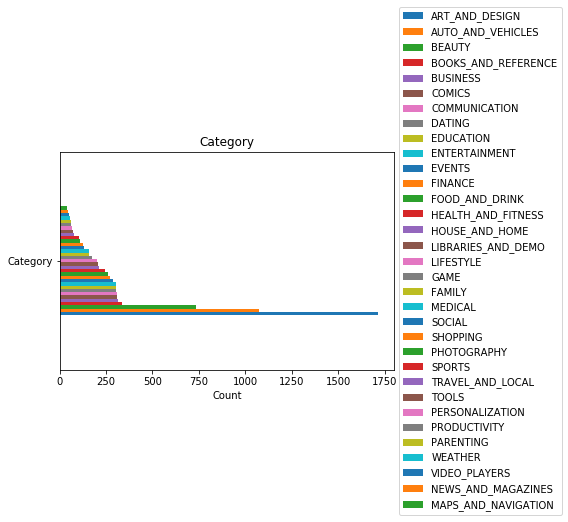

In [115]:
plotHBarGraph(column_name)

In [116]:
pp.pprint(categoricalGroupings('Category'))

          ART_AND_DESIGN  AUTO_AND_VEHICLES  BEAUTY  BOOKS_AND_REFERENCE  \
Category            1717               1074     733                  334   

          BUSINESS  COMICS  COMMUNICATION  DATING  EDUCATION  ENTERTAINMENT  \
Category       317     308            307     305        304            302   

                 ...           SPORTS  TRAVEL_AND_LOCAL  TOOLS  \
Category         ...              106                75     73   

          PERSONALIZATION  PRODUCTIVITY  PARENTING  WEATHER  VIDEO_PLAYERS  \
Category               68            64         61       58             50   

          NEWS_AND_MAGAZINES  MAPS_AND_NAVIGATION  
Category                  45                   42  

[1 rows x 33 columns]


/home/gagan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


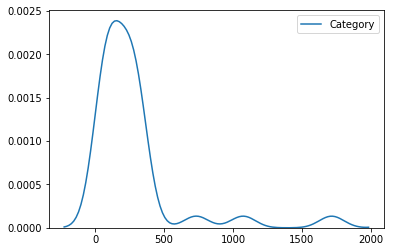

In [117]:
sns.kdeplot(apps_df['Category'].value_counts())

Now I convert the categorical data to numbers.

#### Column 3 - Rating

In [118]:
column_name = 'Rating'
p_stats(column_name)

Description for Column: Rating
count   8,886.000
mean        4.188
std         0.522
min         1.000
25%         4.000
50%         4.300
75%         4.500
max         5.000
Name: Rating, dtype: float64
Unique Values for Column: Rating
array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])


TypeError: 'str' object is not callable

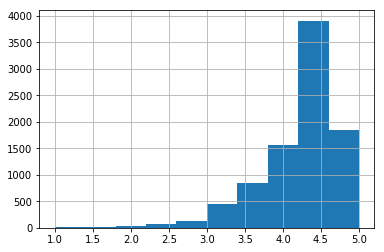

In [119]:
apps_df[column_name].hist()
plt.title('Rating Histogram')
plt.show()

In [ ]:
sns.kdeplot(apps_df[column_name], color="Red", shade=True)
plt.title=('Rating KDE Plot')

#### Column 4 - Reviews
number of app store reviews

In [ ]:
column_name = 'Reviews'
series = apps_df[column_name]

In [ ]:
p_stats(column_name)

In [ ]:
pp.pprint(apps_df[column_name].unique())

In [ ]:
#series.hist(bins = 10)

#### Column 5 - Size
size of app

In [ ]:
column_name = 'Size'

In [ ]:
apps_df[column_name].head()

In [ ]:
apps_df[column_name].value_counts()

In [ ]:
normalize_varies = lambda x : '0k' if x == "Varies with device" else x

In [ ]:
normalize_sizes = lambda x : float(x[:-1]) if x != 0 and x[-1:]=='k' else float(x[:-1])*float(1000)

In [ ]:
normalized_size = apps_df[column_name].apply(normalize_varies)
normalized_size = normalized_size.apply(normalize_sizes)

In [ ]:
normalized_size

Here, we see that many of the values Vary with device. To capture what I believe to be an ordinal relationship, I will disregard the values that have sizes that vary with device and instead plot the data relatively. I will have to transform the M values to on scale with the k values.

#### Column 6 - Installs
number of app downloads

In [ ]:
column_name = 'Installs'

In [ ]:
apps_df[column_name].value_counts()

In [ ]:
normalized_installs = apps_df[column_name]

In [ ]:
x = lambda x : int(x[:-1].replace(',',''))

In [ ]:
normalized_installs = normalized_installs.apply(x)

In [ ]:
pp.pprint(normalized_installs)

#### Column 7 - Type
Paid or Free Apps

In [ ]:
column_name = 'Type'
apps_df[column_name].value_counts()

In [ ]:
normalizer = lambda x : int(0) if x == 'Free' else int(1)

In [ ]:
normalized_type = apps_df[column_name].apply(normalizer)
normalized_type.value_counts()

Converted Paid to 1, and Free to 0.

#### Column 8 - Price
Cost of application

In [ ]:
column_name = 'Price'
p_stats(column_name)

In [ ]:
apps_df[column_name].value_counts()

In [ ]:
normalizer = lambda x : float(0.0) if x == '0' else float(x[1:])

In [ ]:
formatted_price = apps_df[column_name].apply(normalizer).astype('float64')
pp.pprint(formatted_price[formatted_price == 7.49])

In [ ]:
type(formatted_price.values)

and now i normalize the data

In [ ]:
normalized_price = formatted_price
normalized_price = pd.Series(data = preprocessing.minmax_scale(formatted_price), index = formatted_price.index)

In [ ]:
pp.pprint(normalized_price[normalized_price != 0])

In [ ]:
type(normalized_price)

#### Column 9 - Content Rating
Application Maturity Rating

In [ ]:
column_name = 'Content Rating'
p_stats(column_name)

In [ ]:
apps_df[column_name].value_counts()

In [ ]:
ratings_map = {
    'Everyone':1,
    'Everyone 10+':2,
    'Teen':3,
    'Mature 17+':4,
    'Adults only 18+':5,
    'Unrated':6
}

In [ ]:
normalizer = lambda x: ratings_map[x]

In [ ]:
normalized_content_rating = apps_df[column_name].copy().apply(normalizer).astype('int')

In [ ]:
normalized_content_rating.value_counts()

In [ ]:
type(normalized_content_rating)

#### Column 10 - Genres
Application Genre (can have multiple)

In [ ]:
apps_df['Genres']

In [ ]:
p_stats('Genres')

This is good candidate for PCA with Category.

In [ ]:
apps_df['Genres'].value_counts()

#### Column 11 - Last Updated
When the application was last updated

In [ ]:
column_name = 'Last Updated'
p_stats(column_name)

In [ ]:
test = apps_df[column_name].astype('datetime64[ns]')

In [ ]:
min_val = test.min()

In [ ]:
max_val = test.max()

In [ ]:
print('first time', min_val)
print('last time', max_val)

In [ ]:
year_range = test.max().year - test.min().year

In [ ]:
normalizer = lambda x : (x.year - min_val.year) * 12 + x.month
normalized_last_updated = test.apply(normalizer)

In [ ]:
type(normalized_last_updated)

#### Column 12 - Current Version
Current Version of app available on play store.

In [ ]:
column_name = 'Current Ver'

In [ ]:
p_stats(column_name)

This is an arbitrary value set by application developers. A possible correlation occurs because of a psychological effect of higher version numbers, but this hypothesis will not be  validated this study.

#### Column 13 - Android Version
Minimum Required Version to run the App.

In [ ]:
column_name = 'Android Ver'

In [ ]:
p_stats(column_name)

In [ ]:
normalizer = lambda x : x.split(' ')[0]
lazy_cleanup = lambda x : 4.4 if x == '4.4W' else x

In [ ]:
normalized_android_ver = apps_df[column_name].apply(normalizer).apply(lazy_cleanup)
pp.pprint(normalized_android_ver)

In [ ]:
normalized_android_ver.unique()

In [ ]:
strip_latter_periods = lambda x : x if len(x) == 3 else x[0:2] + x[2:].replace('.','')

In [ ]:
normalized_android_ver = normalized_android_ver.astype('str').apply(strip_latter_periods)

In [ ]:
type(normalized_android_ver)

In [ ]:
normalized_android_ver

Here I have taken the android versions of my applications and chopped the first number.

#### creation of normalized dataset

In [ ]:
apps_df.columns

got rid of genres, current version

In [ ]:
norm_apps_df = pd.concat([apps_df['App'],apps_df['Rating'],apps_df['Category'], apps_df['Reviews'], normalized_android_ver, normalized_content_rating, normalized_installs, normalized_last_updated.astype('int'), normalized_price, normalized_type, normalized_size], axis = 1)

In [ ]:
norm_apps_df.rename(columns={0:"Price", 'App':'App Name', 'Size':"Size (kb)"}, inplace= True)

In [ ]:
norm_apps_df.head()

In [ ]:
norm_apps_df['Reviews'] = pd.to_numeric(norm_apps_df['Reviews'])

In [ ]:
norm_apps_df['Android Ver'] = pd.to_numeric(
    norm_apps_df['Android Ver'].apply(lambda x : 0 if x == "Varies" else x)
    )

In [ ]:
norm_apps_df.dtypes

### Data analysis and visualization 
quantitative (statistical) and visual analysis of your
data. You should apply quantitative measures of centrality, distribution, and correlation.
In addition, you should provide visual analysis through plots that are appropriate for a
better understanding of your data and how the data can be used to answer your question.
Extra credit for novel insightful visualizations. Using the appropriate clustering algorithm
for different measures can be very helpful for better understanding the relationships in
your data. 

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


ax.pie(norm_apps_df.Category.value_counts()[:15], 
       labels=norm_apps_df.Category.value_counts().index[:15],
      autopct='%1.1f%%')

ax.set_title('Top 15 Categories in DataSet')

fig.show()

In [ ]:
g = sns.PairGrid(data=norm_apps_df[['Price','Rating','Reviews','Installs']])
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist)
print('Price, Rating, Review, and Installs Correlation')

In [ ]:
x = norm_apps_df['Rating']
y = norm_apps_df['Reviews']

plt.scatter(x, y)
plt.xlabel("Rating")
plt.ylabel("Reviews")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()
print('Correlation between Reviews and Rating')

In [ ]:
x = norm_apps_df['Price']
y = norm_apps_df['Installs']

plt.scatter(x, y)
plt.xlabel("Price")
plt.ylabel("Installs")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

Note the decrease in installs and price increases. Hypothesis supported, as there appears to be a correlation.

In [ ]:
x = norm_apps_df['Rating']
y = norm_apps_df['Installs']

plt.scatter(x, y)
plt.xlabel("Rating")
plt.ylabel("Installs")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

Note the increase in installs and rating increases. Hypothesis supporter!

In [ ]:
g = sns.PairGrid(data=norm_apps_df[['Size (kb)','Android Ver', 'Installs']])
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist)
print('Plotting Size, Android Version, and Installs against one another')

In [ ]:
x = norm_apps_df['Android Ver']
y = norm_apps_df['Size (kb)']

plt.scatter(x, y)
plt.xlabel("Android Version")
plt.ylabel("Size (kb)")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

In [ ]:
x = norm_apps_df['Android Ver']
y = norm_apps_df['Installs']

plt.scatter(x, y)
plt.xlabel("Android Version")
plt.ylabel("Installs")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

In [ ]:
x = norm_apps_df['Installs']
y = norm_apps_df['Size (kb)']

plt.scatter(x, y)
plt.xlabel("Installs")
plt.ylabel("Size (kb)")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

### Data modeling and prediction 
development of a predictive model, regression or
classification. Your model development should include experimentation with feature
selection and hyperparameters. The effect of different features on your target variable, as
well as associations between features should be identified. You should appropriately use
train, validation, and test data when evaluating your models.

In [ ]:
norm_apps_df.head()

#### Supervised Learning - Linear Regression

In [ ]:
linear_df = pd.get_dummies(norm_apps_df['Category'])

In [ ]:
linear_df.head()

In [ ]:
df_no_cat = norm_apps_df.drop('Category',1)

In [ ]:
linear_df = pd.concat([linear_df, norm_apps_df], sort=True)

### Results analysis 
Summary of your interpretation of the results. Are the results
statistically significant? I.e., did you prove or disprove your hypothesis. How could you
improve your analysis? Lessons learned, and feedback on the assignment.

#### Notes...

NoteWorth Investigations

principle component analysis 

dimn redux 
